<a href="https://colab.research.google.com/github/robinyUArizona/PyTorch-Deep-Learning/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
    # Input layer (4 features of the flower) -->
    # Hidden Layer1 (number of neurons) -->
    # H2(n) -->
    # output (3 classes of iris flower)

    def __init__(self, input_features=4, h1=8, h2=9, output_features=3):
        super().__init__() # instantiate our nn.Module
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [3]:
# Pick a manual seed for randomization
torch.manual_seed(36)

# Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)

In [6]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
# Change last column from strings to number
df["variety"] = df["variety"].replace("Setosa", 0.0)
df["variety"] = df["variety"].replace("Versicolor", 1.0)
df["variety"] = df["variety"].replace("Virginica", 2.0)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
# Train Test Split! Set X, y
X = df.drop("variety", axis=1)
y = df["variety"]
display(X.head())
display(y.head())

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,variety
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [9]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [10]:
print("First 5 rows of X:\n", X[0:5])
print("First 5 rows of y:\n", y[0:5])

First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 rows of y:
 [0. 0. 0. 0. 0.]


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [13]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# print(X_train)
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# Set the criterion of model to measure the error, how far off the prediction are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epoch), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [15]:
# model.parameters

In [16]:
# Train model
# Epochs? (one rub through all the training data in our network)
epochs = 220
train_losses = []
val_losses = []


for epoch in range(epochs):
    # ---- Training Phase ----
    model.train()  # Set the model to training mode

    # Forward pass: Compute predicted y by passing X_train to the model
    y_pred = model(X_train) # Get predicted results

    # Measure the loss/error, gonna be high at first
    train_loss = criterion(y_pred, y_train) # predicted values vs. the y_train
    train_losses.append(train_loss.detach().numpy())

    # Do some back propagation: take the error rate of forward propagation and
    # feed it back through the network to fine tune the weights
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()


    # ---- Validation Phase ----
    model.eval()  # Set the model to evaluation mode (turns off dropout, etc.)

    with torch.no_grad():  # No need to track gradients during validation
        y_val_pred = model(X_test)
        val_loss = criterion(y_val_pred, y_test)  # Predicted vs actual (validation)
        val_losses.append(val_loss.detach().numpy())

    # print very 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Training Loss: {train_loss.item()}, Validation Loss: {val_loss.item()}")


Epoch: 0, Training Loss: 1.118369460105896, Validation Loss: 1.126200556755066
Epoch: 10, Training Loss: 1.0879839658737183, Validation Loss: 1.0950660705566406
Epoch: 20, Training Loss: 1.0566396713256836, Validation Loss: 1.0687497854232788
Epoch: 30, Training Loss: 1.0225790739059448, Validation Loss: 1.0359675884246826
Epoch: 40, Training Loss: 0.9825470447540283, Validation Loss: 0.999671220779419
Epoch: 50, Training Loss: 0.9304659962654114, Validation Loss: 0.9522139430046082
Epoch: 60, Training Loss: 0.865359902381897, Validation Loss: 0.8933666348457336
Epoch: 70, Training Loss: 0.7898209691047668, Validation Loss: 0.8259115219116211
Epoch: 80, Training Loss: 0.7107222080230713, Validation Loss: 0.7492019534111023
Epoch: 90, Training Loss: 0.6345570683479309, Validation Loss: 0.6753506064414978
Epoch: 100, Training Loss: 0.5619022250175476, Validation Loss: 0.5991153120994568
Epoch: 110, Training Loss: 0.49234312772750854, Validation Loss: 0.5258777737617493
Epoch: 120, Traini

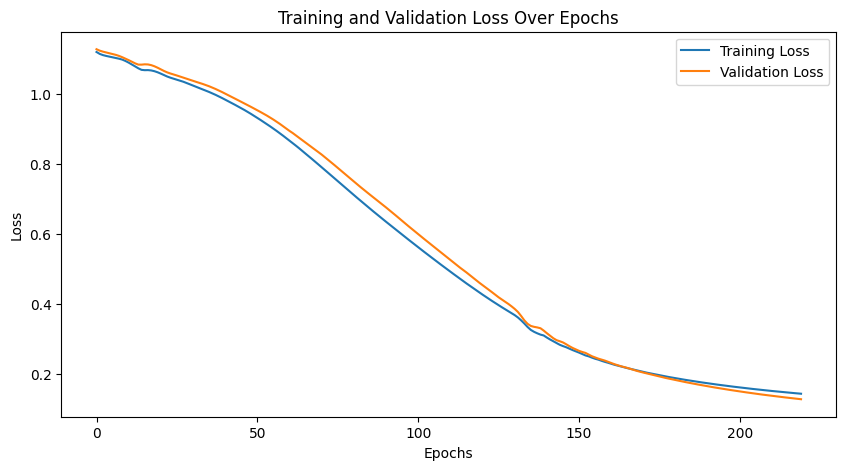

In [17]:
# After training, you can plot the losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [18]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test) # Find the loss or error

In [19]:
loss

tensor(0.1289)

In [20]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        # if y_test[i] == 0:
        #     x = "Setosa"
        # elif y_test[i] == 1:
        #     x = "Versicolor"
        # else:
        #     x = "Virginica"

        # Will tell us what type of flower class our network thinks it is
        print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct +=1
print(f"We got {correct} correct!")

1.) tensor([-1.2021,  1.0916, -0.5505]) 	 1 	 1
2.) tensor([-3.2025, -1.6691,  1.8952]) 	 2 	 2
3.) tensor([-1.2021,  1.0916, -0.5505]) 	 1 	 1
4.) tensor([-5.8209, -5.2523,  5.0453]) 	 2 	 2
5.) tensor([-4.6828, -3.7118,  3.6910]) 	 2 	 2
6.) tensor([-1.2021,  1.0916, -0.5505]) 	 1 	 1
7.) tensor([-1.2021,  1.0916, -0.5505]) 	 1 	 1
8.) tensor([-1.2021,  1.0916, -0.5505]) 	 1 	 1
9.) tensor([-1.2021,  1.0916, -0.5505]) 	 1 	 1
10.) tensor([-1.3504,  0.9026, -0.3707]) 	 1 	 1
11.) tensor([-1.2021,  1.0916, -0.5505]) 	 1 	 1
12.) tensor([ 3.1003, -2.8009, -4.5993]) 	 0 	 0
13.) tensor([-2.4203, -0.5871,  0.9386]) 	 2 	 2
14.) tensor([-1.2021,  1.0916, -0.5505]) 	 1 	 1
15.) tensor([ 2.5976, -2.3461, -4.1262]) 	 0 	 0
16.) tensor([ 3.0752, -2.7782, -4.5756]) 	 0 	 0
17.) tensor([ 3.1550, -2.8504, -4.6507]) 	 0 	 0
18.) tensor([-1.7237,  0.3717,  0.0872]) 	 1 	 1
19.) tensor([ 3.6539, -3.3018, -5.1203]) 	 0 	 0
20.) tensor([-2.9270, -1.2818,  1.5577]) 	 2 	 2
21.) tensor([ 3.2399, -2.9272

In [21]:
## Unseen New Data
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [22]:
with torch.no_grad():
    print(model(new_iris))

tensor([ 2.8932, -2.6136, -4.4044])


In [23]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.0])

In [24]:
with torch.no_grad():
    print(model(newer_iris))

tensor([-1.2299,  1.0639, -0.5175])
